In [1]:
import spacy

In [3]:
import nltk

In [5]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DAI.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [7]:
nltk.download("maxent_ne_chunker")
nltk.download("maxent_ne_chunker_tab")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\DAI.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\DAI.STUDENTSDC\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


True

In [9]:
import numpy
numpy.version.full_version

'2.0.2'

In [11]:
from nltk import word_tokenize, pos_tag, ne_chunk

# Sample test
test = "Sachin Tendulkar was born in Mumbai, India on April 24, 1974."

# Tokenize the text into words
tokens = word_tokenize(test)

# PoS tagging
tagged_tokens = pos_tag(tokens)

# Perform Named entity Recognition (NER)
ner_tree = ne_chunk(tagged_tokens)

# Display the NER Tree
print(ner_tree)

(S
  (PERSON Sachin/NNP)
  (PERSON Tendulkar/NNP)
  was/VBD
  born/VBN
  in/IN
  (GPE Mumbai/NNP)
  ,/,
  (GPE India/NNP)
  on/IN
  April/NNP
  24/CD
  ,/,
  1974/CD
  ./.)


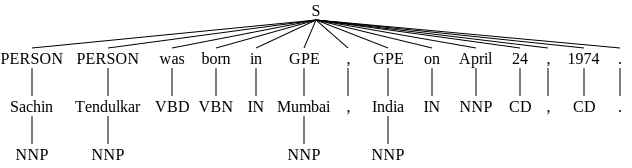

In [17]:
ner_tree

In [14]:
ner_tree.pos()

[(('Sachin', 'NNP'), 'PERSON'),
 (('Tendulkar', 'NNP'), 'PERSON'),
 (('was', 'VBD'), 'S'),
 (('born', 'VBN'), 'S'),
 (('in', 'IN'), 'S'),
 (('Mumbai', 'NNP'), 'GPE'),
 ((',', ','), 'S'),
 (('India', 'NNP'), 'GPE'),
 (('on', 'IN'), 'S'),
 (('April', 'NNP'), 'S'),
 (('24', 'CD'), 'S'),
 ((',', ','), 'S'),
 (('1974', 'CD'), 'S'),
 (('.', '.'), 'S')]

In [19]:
out = []
crit = set(["PERSON", "GPE"])
for ele, type in ner_tree.pos(): 
    if type in crit:
        out.append((ele[0], type))
        # print(ele)
for ele, type in out:
    print(ele, type)


Sachin PERSON
Tendulkar PERSON
Mumbai GPE
India GPE


In [25]:
nlp = spacy.load("en_core_web_sm")

In [83]:
sent = nlp("""Mark Zukerbrg will meet Aditya Joshi in New York, USA on Monday 21, 2024 4pm for ₹3 Trillion deal.""")

In [85]:
sent

Mark Zukerbrg will meet Aditya Joshi in New York, USA on Monday 21, 2024 4pm for ₹3 Trillion deal.

In [87]:
sent.ents

(Mark Zukerbrg, Aditya Joshi, New York, USA, Monday 21, 2024 4, ₹3 Trillion)

In [89]:
for word in sent.ents:
    print(word.ents[0], " --> ", word.label_)

Mark Zukerbrg  -->  PERSON
Aditya Joshi  -->  PERSON
New York  -->  GPE
USA  -->  GPE
Monday 21, 2024 4  -->  DATE
₹3 Trillion  -->  MONEY


In [97]:
spacy.explain("MONEY")

'Monetary values, including unit'

In [99]:
nlp = spacy.load("en_core_web_sm")

In [111]:
raw_text = """Indigenous people have lived in Alaska for thousands of years, and it is widely believed that the region served as 
the entry point for the initial settlement of North America by way of the Bering land bridge. The Russian Empire was the first 
to actively colonize the area beginning in the 18th century, eventually establishing Russian America, which spanned most of the 
current state and promoted and maintained a native Alaskan Creole population.[7] The expense and logistical difficulty of maintaining 
this distant possession prompted its sale to the U.S. in 1867 for US$7.2 million (equivalent to $157 million in 2023). The area went 
through several administrative changes before becoming organized as a territory on May 11, 1912. It was admitted as the 49th state 
of the U.S. on January 3, 1959"""

In [113]:
sent_2 = nlp(raw_text)

In [115]:
sent_2.ents

(Alaska,
 thousands of years,
 North America,
 Bering,
 The Russian Empire,
 first,
 the 18th century,
 Russian America,
 Alaskan,
 U.S.,
 1867,
 US$7.2 million,
 $157 million,
 2023,
 May 11, 1912,
 49th,
 U.S.,
 January 3, 1959)

In [117]:
for word in sent_2.ents:
    print(word.ents[0], " --> ", word.label_)

Alaska  -->  GPE
thousands of years  -->  DATE
North America  -->  LOC
Bering  -->  GPE
The Russian Empire  -->  GPE
first  -->  ORDINAL
the 18th century  -->  DATE
Russian America  -->  LOC
Alaskan  -->  NORP
U.S.  -->  GPE
1867  -->  DATE
US$7.2 million  -->  MONEY
$157 million  -->  MONEY
2023  -->  DATE
May 11, 1912  -->  DATE
49th  -->  ORDINAL
U.S.  -->  GPE
January 3, 1959  -->  DATE


In [109]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

### Display NER in an interactive way.

In [121]:
from spacy import displacy


In [129]:
displacy.render(sent_2, style = "dep", jupyter = True)